# Using classifiers that expect onehot-encoded outputs (Keras)

    Most objects for classification that mimick the scikit-learn estimator API should be compatible with the 
    
    plot_decision_regions function. However, if the classification model (e.g., a typical Keras model) output onehot-
    
    encoded predictions, we have to use an additional trick. I.e., for onehot encoded outputs, we need to wrap the Keras 
    
    model into a class that converts these onehot encoded variables into integers. Such a wrapper class can be as simple
    
    as the following:

In [1]:
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

## The example below illustrates how the Onehot2Int class can be used with a Keras model that outputs onehot encoded labels:

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.plotting import plot_decision_regions
from keras.utils import to_categorical

X, y = iris_data()
X = X[:, [2, 3]]

X = standardize(X)

# OneHot encoding
y_onehot = to_categorical(y)

# Create the model
np.random.seed(123)
model = Sequential()
model.add(Dense(8, input_shape=(2,), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# Configure the model and start training
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.adam(lr=0.005), metrics=['accuracy'])
history = model.fit(X, y_onehot, epochs=10, batch_size=5, verbose=1, validation_split=0.1)

Using TensorFlow backend.


Train on 135 samples, validate on 15 samples
Epoch 1/10
135/135 [==============================] - 1s 6ms/step - loss: 1.0488 - accuracy: 0.4074 - val_loss: 1.1137 - val_accuracy: 0.0000e+00
Epoch 2/10
135/135 [==============================] - 0s 267us/step - loss: 0.8552 - accuracy: 0.6519 - val_loss: 1.1566 - val_accuracy: 0.0000e+00
Epoch 3/10
135/135 [==============================] - 0s 311us/step - loss: 0.6598 - accuracy: 0.6889 - val_loss: 1.1101 - val_accuracy: 0.0000e+00
Epoch 4/10
135/135 [==============================] - 0s 289us/step - loss: 0.5323 - accuracy: 0.7185 - val_loss: 1.0635 - val_accuracy: 0.0000e+00
Epoch 5/10
135/135 [==============================] - 0s 311us/step - loss: 0.4367 - accuracy: 0.8444 - val_loss: 1.0048 - val_accuracy: 0.6667
Epoch 6/10
135/135 [==============================] - 0s 311us/step - loss: 0.3775 - accuracy: 0.8963 - val_loss: 0.9082 - val_accuracy: 0.8000
Epoch 7/10
135/135 [==============================] - 0s 289us/step - loss: 0

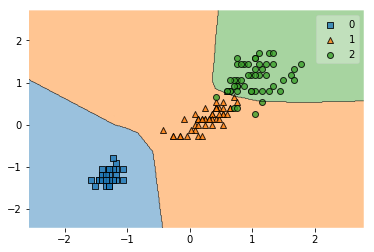

In [3]:
# Wrap keras model
model_no_ohe = Onehot2Int(model)

# Plot decision boundary
plot_decision_regions(X, y, clf=model_no_ohe)
plt.show()